In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
cols = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(data, names=cols)

In [ ]:
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: floa

In [ ]:
df.corr

<bound method DataFrame.corr of     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1     14.23        1.71  2.43               15.6        127           2.80   
1     13.20        1.78  2.14               11.2        100           2.65   
1     13.16        2.36  2.67               18.6        101           2.80   
1     14.37        1.95  2.50               16.8        113           3.85   
1     13.24        2.59  2.87               21.0        118           2.80   
..      ...         ...   ...                ...        ...            ...   
3     13.71        5.65  2.45               20.5         95           1.68   
3     13.40        3.91  2.48               23.0        102           1.80   
3     13.27        4.28  2.26               20.0        120           1.59   
3     13.17        2.59  2.37               20.0        120           1.65   
3     14.13        4.10  2.74               24.5         96           2.05   

    Flavanoids  Nonflavanoid ph

In [ ]:
x = df.iloc[:,[0,5]].values
x

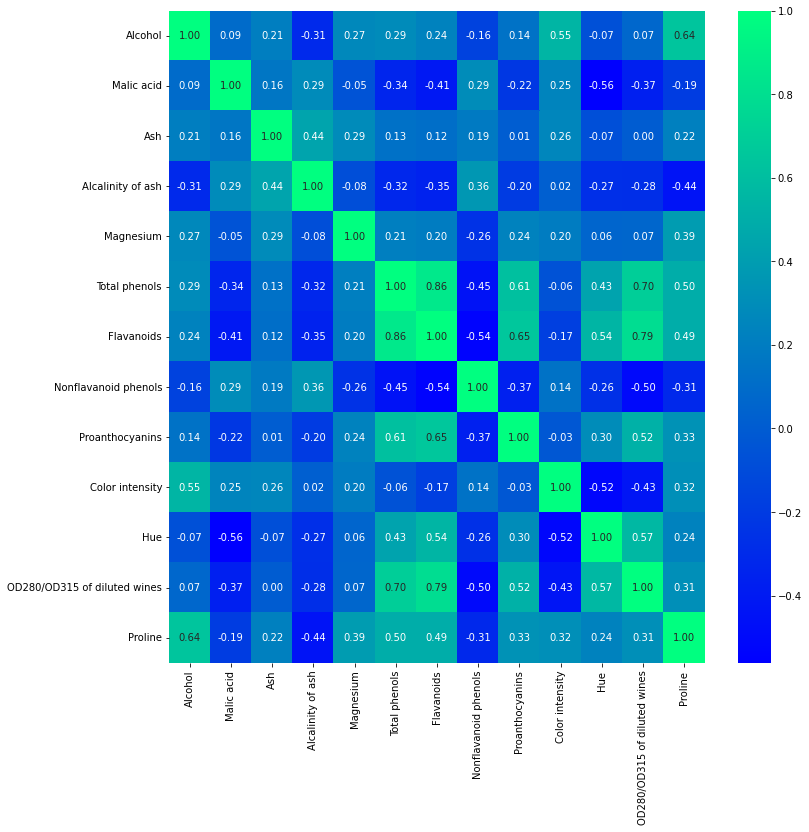

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='winter',fmt=".2f", annot=True)
plt.show()

In [ ]:
df.isna().sum()

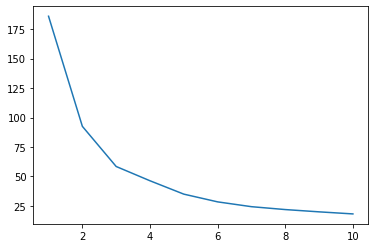

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_means = kmeans.fit_predict(x)

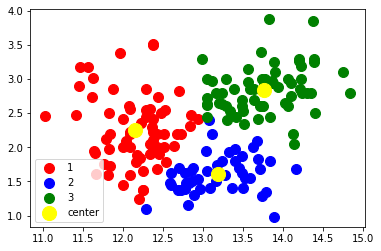

In [ ]:
plt.scatter(x[y_means==0,0], x[y_means==0,1], s=100, c='red', label='1')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=100, c='blue', label='2' )
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=100, c='green', label='3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label='center')
plt.legend()
plt.show()